<a href="https://colab.research.google.com/github/jenn2325/Jen/blob/main/Amazon_Prime_Video_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:
Build a numeric predict model to predict cvt_per_day based on information provided from the data.
1. Exploratory Data Analysis
2. Selecte/transform/engineer new features
3. Train and evaluate models
4. Additional insights

# Part 0: Load packages and data

In [ ]:
# Import libraries and change dispaly setings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import colors
import seaborn as sns
%matplotlib inline
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# upload data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# read data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Amazon_Prime/TVdata.txt')

# Part 1: Exploratory Data Analysis



## Part 1.1: Data Overview

In [ ]:
df.head(6)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667
5,389496,135076.609750,1,5,mgm,2000,Comedy,13250,60000000,32095318,5.5,98.468350,37,no award,PG-13,2.750000


In [ ]:
print(df.shape)

(4226, 16)


In [ ]:
# Check for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [ ]:
#check duplicates:
if df['video_id'].duplicated().sum()==0:
  print('no duplicates')
else:
  print('duplicates found')

no duplicates


## Part 1.2: Numerical Features

In [ ]:
# Statistics on numerical features
df.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,280371.162565,4218.630239,7.782537,28.103644,2001.056791,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,112640.127822,13036.079964,6.134183,11.863649,17.496849,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,7909.000000,2.187625,1.000000,1.000000,1916.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
25%,285104.250000,351.168776,4.000000,20.000000,1998.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,313891.500000,1193.499989,6.000000,28.000000,2008.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,349345.750000,3356.788816,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
max,394880.000000,307127.605608,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64']).copy()
# Dropping 'video_id' and 'release_year' from df_num
df_num.drop(columns=['video_id', 'release_year'],axis=1, inplace=True)

In [ ]:
# check on features that have 0 values
df_num[['imdb_votes', 'imdb_rating', 'star_category', 'budget','metacritic_score','boxoffice']].describe(percentiles= [0.05,0.1,0.25, 0.5,0.75])

,imdb_votes,imdb_rating,star_category,budget,metacritic_score,boxoffice
count,4226.000000,4226.000000,4226.000000,4.226000e+03,4226.000000,4.226000e+03
mean,6462.924042,5.257099,0.954651,2.150743e+06,15.973734,2.536338e+06
std,31596.006790,2.122810,0.955045,7.176604e+06,26.205217,8.243516e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
5%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
10%,8.000000,2.300000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,81.000000,4.300000,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,535.000000,5.800000,1.000000,0.000000e+00,0.000000,0.000000e+00
75%,3053.000000,6.800000,1.666667,1.500000e+06,41.000000,0.000000e+00
max,948630.000000,10.000000,4.000000,1.070000e+08,100.000000,1.842088e+08



  - features have over 50% of missing values(shown as '0'): boxoffice
  - features have over 50% of missing values: budget, metacritic_score
  - features have over 25% of missing values: star_category
  - features have less than 10% of missing values: imdb_rating, imdb_votes


---



---


**Need to handle these 0 values**

In [ ]:
#df1 = df.copy()
df_num[['imdb_votes', 'imdb_rating', 'star_category', 'budget','metacritic_score','boxoffice']] = df_num[['imdb_votes', 'imdb_rating', 'star_category', 'budget','metacritic_score','boxoffice']].replace(0,np.nan)

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cvt_per_day                    4226 non-null   float64
 1   weighted_categorical_position  4226 non-null   int64  
 2   weighted_horizontal_poition    4226 non-null   int64  
 3   imdb_votes                     3882 non-null   float64
 4   budget                         1772 non-null   float64
 5   boxoffice                      1032 non-null   float64
 6   imdb_rating                    3882 non-null   float64
 7   duration_in_mins               4226 non-null   float64
 8   metacritic_score               1214 non-null   float64
 9   star_category                  2380 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 330.3 KB


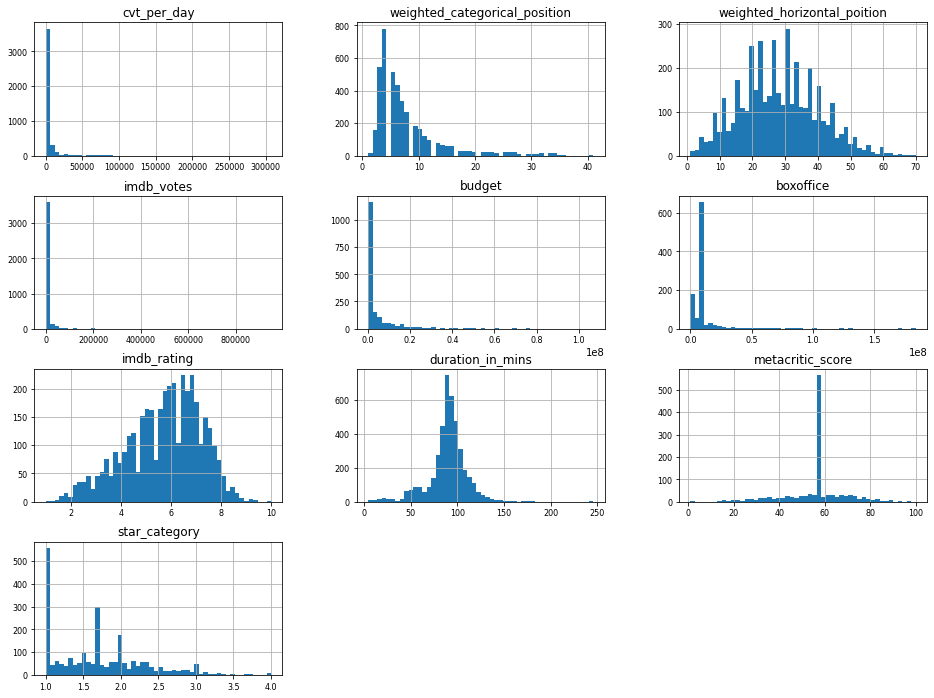

In [ ]:
df_num.hist(figsize=(16, 12), bins=50, xlabelsize=8, ylabelsize=8);

#### `cvt_per_day` feature:

In [ ]:
df_num[['cvt_per_day']].describe(percentiles=[0.95])

,cvt_per_day
count,4226.000000
mean,4218.630239
std,13036.079964
min,2.187625
50%,1193.499989
95%,14692.833929
max,307127.605608


Only plot `cvt_per_day` less than 15000(removing top 5% values to have a closer look on the distribution of this feature.

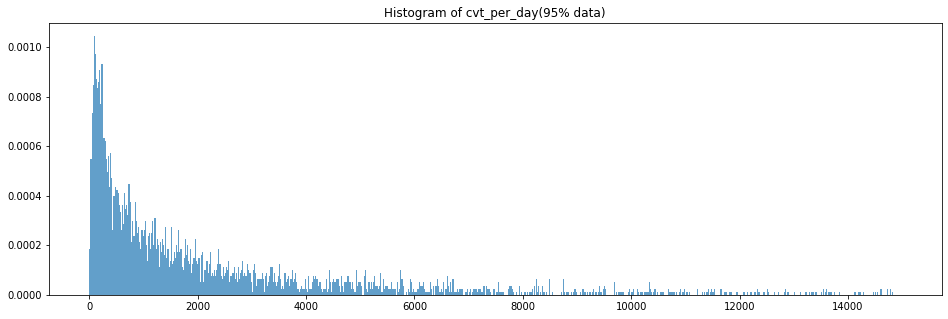

In [ ]:
fig1 = plt.figure(figsize = (16,5))
plt.hist(df_num['cvt_per_day'], bins = range(0, 15000,20), alpha = 0.7, density= True, label = 'cvt_per_day')
plt.title('Histogram of cvt_per_day(95% data)');

#### Correlations among numerical features:

In [ ]:
corr = df_num.corr()
corr

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000000,-0.148000,-0.301663,0.298679,0.267897,0.180123,0.023010,0.152217,-0.075387,0.140734
weighted_categorical_position,-0.148000,1.000000,-0.084066,-0.056056,-0.107294,-0.132293,0.157480,-0.174461,0.164215,-0.027339
weighted_horizontal_poition,-0.301663,-0.084066,1.000000,-0.230089,-0.240842,-0.210672,-0.252049,-0.102344,-0.036440,-0.128852
imdb_votes,0.298679,-0.056056,-0.230089,1.000000,0.212695,0.447187,0.175532,0.158981,0.158806,0.173412
budget,0.267897,-0.107294,-0.240842,0.212695,1.000000,0.366883,0.070170,0.288369,-0.177661,0.295011
boxoffice,0.180123,-0.132293,-0.210672,0.447187,0.366883,1.000000,0.044701,0.147069,0.048648,0.143907
imdb_rating,0.023010,0.157480,-0.252049,0.175532,0.070170,0.044701,1.000000,0.134506,0.464296,0.233831
duration_in_mins,0.152217,-0.174461,-0.102344,0.158981,0.288369,0.147069,0.134506,1.000000,0.080042,0.144910
metacritic_score,-0.075387,0.164215,-0.036440,0.158806,-0.177661,0.048648,0.464296,0.080042,1.000000,0.016152
star_category,0.140734,-0.027339,-0.128852,0.173412,0.295011,0.143907,0.233831,0.144910,0.016152,1.000000


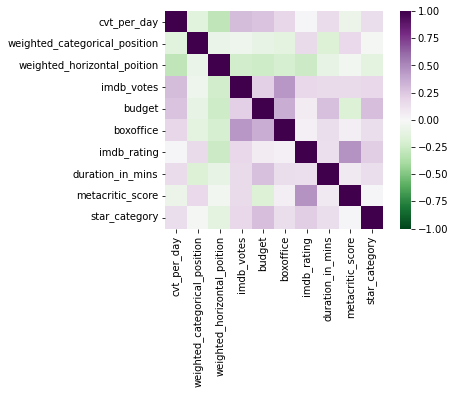

In [ ]:
sns.heatmap(corr, cmap='PRGn_r', vmax=1,vmin=-1, square=True);

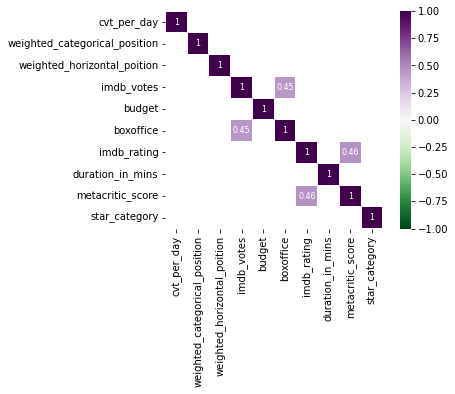

In [ ]:
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='PRGn_r', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Part 1.3: Categorical features

In [ ]:
# Statistics on non-numerical features
df.describe(include=['object'])

,import_id,genres,awards,mpaa
count,4226,4226,4226,4226
unique,4,1165,5,6
top,other,Documentary,no award,NotRated
freq,2963,269,2569,2158


#### `'import_id'`:

In [ ]:
df['import_id'].value_counts()

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64

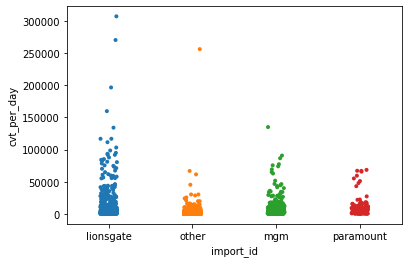

In [ ]:
sns.stripplot(x = 'import_id', y = 'cvt_per_day', data = df,jitter=True, size = 4);

#### `'awards'` :

In [ ]:
df['awards'].value_counts()

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64

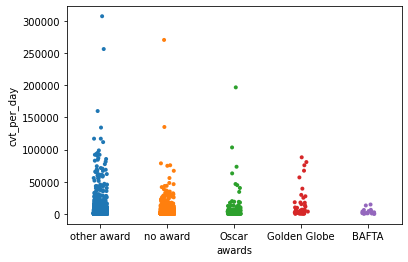

In [ ]:
sns.stripplot(x = 'awards', y = 'cvt_per_day', data = df, jitter =True, size = 4);

#### `'mpaa'`:

In [ ]:
df['mpaa'].value_counts()

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64

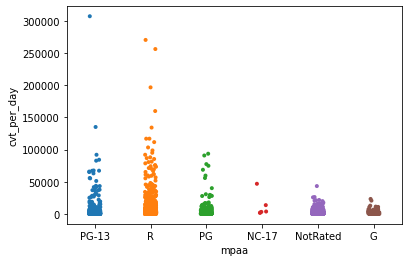

In [ ]:
sns.stripplot(x = 'mpaa', y= 'cvt_per_day', data = df, jitter = True, size =4)

#### `'genres'`:

Some videos belong to more than one genre, the genre of each video should be splitted. 

In [ ]:
genres = df['genres'].str.get_dummies(sep = ',').sum(axis = 0)
print(genres.index)

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Anime', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Foreign/International', 'Holiday',
       'Horror', 'Independent', 'Kids & Family', 'LGBT', 'Lifestyle', 'Music',
       'Musicals', 'Mystery', 'Reality', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')


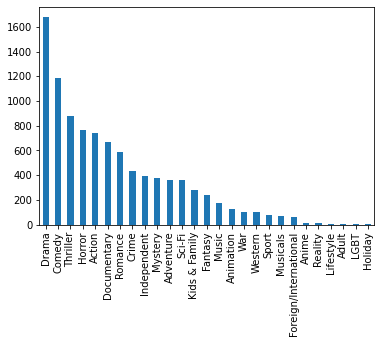

In [ ]:
genres.sort_values(ascending=False).plot.bar();

Notice the last 6 genres have very small counts. It would be a good idea to group them as one named 'others' in feature preprocessing.

#### `'release_year'`:

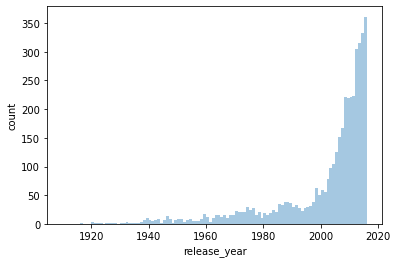

In [ ]:
plt.hist(df['release_year'], bins = range(1910, 2017, 1), alpha = 0.4)
plt.xlabel('release_year')
plt.ylabel('count');

# Part 2: Preprocessing

## Part 2.1: Numerical Features
Filling missing data with mean value


In [ ]:
df_num['imdb_votes']=df_num['imdb_votes'].fillna(df_num['imdb_votes'].mean())
df_num['budget']=df_num['budget'].fillna(df_num['budget'].mean())
df_num['boxoffice']=df_num['boxoffice'].fillna(df_num['boxoffice'].mean())
df_num['imdb_rating']=df_num['imdb_rating'].fillna(df_num['imdb_rating'].mean())
df_num['metacritic_score']=df_num['metacritic_score'].fillna(df_num['metacritic_score'].mean())
df_num['star_category']=df_num['star_category'].fillna(df_num['star_category'].mean())

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cvt_per_day                    4226 non-null   float64
 1   weighted_categorical_position  4226 non-null   int64  
 2   weighted_horizontal_poition    4226 non-null   int64  
 3   imdb_votes                     4226 non-null   float64
 4   budget                         4226 non-null   float64
 5   boxoffice                      4226 non-null   float64
 6   imdb_rating                    4226 non-null   float64
 7   duration_in_mins               4226 non-null   float64
 8   metacritic_score               4226 non-null   float64
 9   star_category                  4226 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 330.3 KB


### Part 2.1.1 Feature Scaling

In [ ]:
scale_list = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
df_num[scale_list] = preprocessing.StandardScaler().fit_transform(df_num[scale_list])
df_num.head()


,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
0,307127.605608,-1.105826,-2.116264,1.984496,1.470049,4.695913,0.541892,1.078791,-0.629733,0.032892
1,270338.426375,-1.105826,-2.116264,1.258002,1.470049,-1.022340,0.541892,0.257409,-1.997101,3.434028
2,256165.867446,-1.105826,-2.116264,6.043083,3.108277,3.897514,1.099791,1.243025,0.327425,2.101548
3,196622.720996,-0.779746,-2.031963,11.077168,1.470049,0.766744,1.309003,1.951625,5.249951,-0.062811
4,159841.652064,-1.105826,-2.116264,1.258478,3.289972,-0.264775,0.472155,0.758378,-2.544049,3.029131


## Part 2.2: Categorical Features
Before one-hot encodes categorical features, `'release_year'` can be binned into less buckets and some `'genres'` can be grouped into 1.

In [ ]:
# One-hot encodes 'import_id', 'awards', 'mpaa'
df_import_id = pd.get_dummies(df['import_id']).astype(np.int64)
df_awards = pd.get_dummies(df['awards']).astype(np.int64)
df_mpaa = pd.get_dummies(df['mpaa']).astype(np.int64)

In [ ]:
# Group least popular genres into one group and then one-hot encoding:
df_genres = df['genres'].str.get_dummies(sep = ',').astype(np.int64)
df_genres['Others'] = np.sum([df_genres['Holiday'], df_genres['LGBT'], df_genres['Adult'], df_genres['Lifestyle'], df_genres['Reality'], df_genres['Anime']], axis=0)
df_genres.drop(['Holiday', 'LGBT', 'Adult', 'Lifestyle', 'Reality', 'Anime'],axis=1, inplace=True)

The release year of video varies through a wide range. Considering the popularity of a video usually decays over time, the release_year should be bucketed based on the release_year range.

In [ ]:
df['release_year'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.1    1974.0
0.2    1991.0
0.3    2001.0
0.4    2006.0
0.5    2008.0
0.6    2010.0
0.7    2012.0
0.8    2013.0
0.9    2014.0
1.0    2017.0
Name: release_year, dtype: float64

In [ ]:
# binning 'release_year' with bucket size of 10
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']

year_bin = pd.cut(df['release_year'], bin_year, labels=year_range)
df_year = pd.get_dummies(year_bin).astype(np.int64)

In [ ]:
# Concat all categorical features into a dataset

df_new = pd.concat([df_num, df_import_id, df_awards, df_mpaa, df_genres, df_year], axis=1)
df_new.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,BAFTA,Golden Globe,Oscar,no award,other award,G,NC-17,NotRated,PG,PG-13,R,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Others,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,307127.605608,-1.105826,-2.116264,1.984496,1.470049,4.695913,0.541892,1.078791,-0.629733,0.032892,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,270338.426375,-1.105826,-2.116264,1.258002,1.470049,-1.022340,0.541892,0.257409,-1.997101,3.434028,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,256165.867446,-1.105826,-2.116264,6.043083,3.108277,3.897514,1.099791,1.243025,0.327425,2.101548,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,196622.720996,-0.779746,-2.031963,11.077168,1.470049,0.766744,1.309003,1.951625,5.249951,-0.062811,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,159841.652064,-1.105826,-2.116264,1.258478,3.289972,-0.264775,0.472155,0.758378,-2.544049,3.029131,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Part 3: Model Training

In [ ]:
train, test = train_test_split(df_new, test_size = 0.1, random_state = 123)
train_x = train.drop(['cvt_per_day'],axis = 1)
train_y = train['cvt_per_day']
test_x = test.drop(['cvt_per_day'],axis = 1)
test_y = test['cvt_per_day']

### Part 3.1 Linear Regression-LASSO

In [ ]:
lr_train, lr_validation = train_test_split(train, test_size=0.1, random_state = 0)
lr_train_x = lr_train.drop(['cvt_per_day'],axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validation_x = lr_validation.drop(['cvt_per_day'],axis = 1)
lr_validation_y = lr_validation['cvt_per_day']

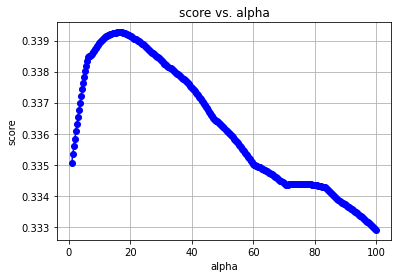

The optimaized alpha and score of Lasso linear is: 


(None, 16.23076923076923, 0.3392670107874811)

In [ ]:
alphas = np.linspace (1, 100, num=300)
scores = np.empty_like(alphas)
opt_alpha = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validation_x, lr_validation_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_alpha = a
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model1_para = opt_alpha
print ('The optimaized alpha and score of Lasso linear is: '), opt_alpha, max_score

In [ ]:
# combine the validate data and training data, use the optimal alpha, re-train the model

lasso_f = Lasso()
lasso_f.set_params(alpha = opt_alpha)
lasso_f.fit(train_x, train_y)

Lasso(alpha=16.23076923076923)

### Part 3.2 Linear Regression-Ridge

The optimaized alpha and score of Ridge linear is: 


(None, 91.98196392785572, 0.34121732153039497)

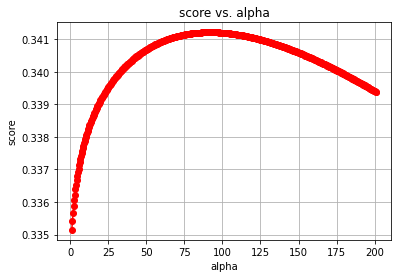

In [ ]:
alphas = np.linspace (1, 201, num=500)
scores = np.empty_like(alphas)
opt_alpha1 = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validation_x, lr_validation_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_alpha1 = a
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
model3_para = opt_alpha1
print ('The optimaized alpha and score of Ridge linear is: '), opt_alpha1, max_score

In [ ]:
# combine the validate data and training data, use the optimal alpha, re-train the model

ridge_f = Ridge()
ridge_f.set_params(alpha = opt_alpha1)
ridge_f.fit(train_x, train_y)

Ridge(alpha=91.98196392785572)

## Part 3.3 Random Forest

In [ ]:
rf=RandomForestRegressor(random_state=2,max_features='sqrt',n_jobs=-1)
param_grid={'n_estimators':[55,56,57,58,59,60,61,62,63,64,65,66,67],'max_depth':[13,14,15,16,17,18,19,20]}
clf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,refit=True,n_jobs=-1,pre_dispatch='2*n_jobs') 
clf.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='sqrt', n_jobs=-1,
                                             random_state=2),
             n_jobs=-1,
             param_grid={'max_depth': [13, 14, 15, 16, 17, 18, 19, 20],
                         'n_estimators': [55, 56, 57, 58, 59, 60, 61, 62, 63,
                                          64, 65, 66, 67]})

In [ ]:
result=clf.cv_results_
max_depth=[13,14,15,16,17,18,19,20]   
n_estimators=[55,56,57,58,59,60,61,62,63,64,65,66,67]   
scores=clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(n_estimators))
scores

array([[0.49687053, 0.49707844, 0.49723755, 0.49603937, 0.49412487,
        0.49534859, 0.49733895, 0.49983126, 0.49943913, 0.49873045,
        0.4994671 , 0.49795409, 0.49873437],
       [0.48712006, 0.48525972, 0.48631286, 0.48351572, 0.48445009,
        0.48494319, 0.48666588, 0.48786685, 0.48798381, 0.48844232,
        0.49010987, 0.49043653, 0.48969431],
       [0.50354522, 0.50204097, 0.50266948, 0.50059638, 0.49966161,
        0.50546677, 0.50621493, 0.50915613, 0.5076165 , 0.50674058,
        0.50934159, 0.50858638, 0.50868568],
       [0.49129274, 0.489639  , 0.49057699, 0.48834214, 0.48815934,
        0.49031754, 0.4926234 , 0.49453119, 0.49390995, 0.49376374,
        0.49847999, 0.49774911, 0.49849178],
       [0.48972011, 0.48880195, 0.4898231 , 0.4915768 , 0.49226538,
        0.49259832, 0.49287165, 0.49437911, 0.49338457, 0.49306832,
        0.49387284, 0.49239991, 0.49483337],
       [0.48767883, 0.48425119, 0.48575548, 0.48402092, 0.48433322,
        0.48569775, 0.48696

the best parameter for max_depth is: 15
the best parameter for n_estimators is: 65


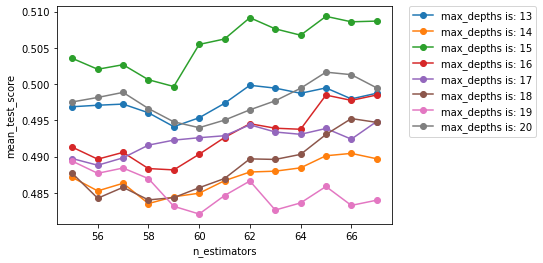

In [ ]:
plt.figure(1)
plt.subplot(1,1,1)
for i,j in enumerate(max_depth):
  plt.plot(n_estimators,scores[i],'-o',label='max_depths is: '+str(j))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
print('the best parameter for max_depth is: '+str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: '+str(clf.best_params_['n_estimators']))

# Part 4 Model Evaluation

## Part 4.1 Lasso

In [ ]:
pred_y = lasso_f.predict(test_x)
lasso_score=lasso.score(test_x,test_y)
MSE_lasso=mean_squared_error(test_y,pred_y)
RMSE_lasso=np.sqrt(MSE_lasso)
print ('lasso score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso score:  0.1895476010026882
Mean square error of lasso:  90645308.7406636
Root mean squared error of lasso: 9520.782989894455


## Part 4.2 Ridge

In [ ]:
pred_y = ridge_f.predict(test_x)
ridge_score=ridge_f.score(test_x,test_y)
MSE_ridge=mean_squared_error(test_y,pred_y)
RMSE_ridge=np.sqrt(MSE_ridge)
print ('ridge score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge score:  0.18944577891694858
Mean square error of ridge:  89529651.34642234
Root mean squared error of ridge: 9462.01095679044


## Part 4.3 Random Forest

In [ ]:
rf=RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'],max_features='sqrt',random_state=2,n_jobs=-1)
rf.fit(train_x,train_y)
pred_y=rf.predict(test_x)
rf_score=rf.score(test_x,test_y)
MSE_rf=mean_squared_error(test_y,pred_y)
RMSE_rf=np.sqrt(MSE_rf)
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.7494123437591241
Mean square error of rf:  27678623.97284833
Root mean squared error of rf: 5261.047801802254


## Part 4.4 Comparison

In [ ]:
lst_score = [lasso_score, ridge_score, rf_score]
MSE_lst =  [MSE_lasso, MSE_ridge, MSE_rf]
RMSE_lst =  [RMSE_lasso, RMSE_ridge, RMSE_rf]
model_lst = ['Lasso_linear', 'Ridge linear', 'Random forest']

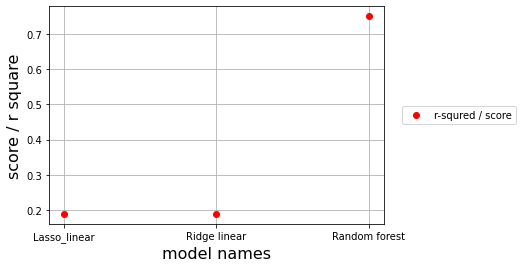

In [ ]:
# R_squared: 

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['r-squred / score'], bbox_to_anchor=(1.04,0.5), loc="center left")
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True);

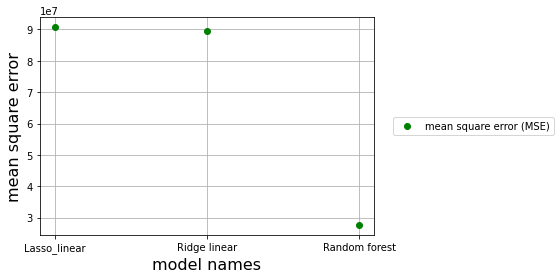

In [ ]:
# Mean Squared Errors

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'go')
plt.legend(['mean square error (MSE)'], bbox_to_anchor=(1.04,0.5), loc="center left")
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True);

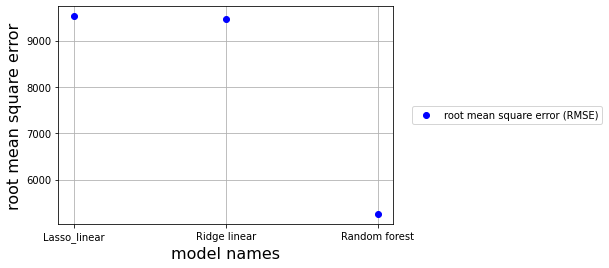

In [ ]:
# Root Mean Squared Errors
plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bo')
plt.legend(['root mean square error (RMSE)'], bbox_to_anchor=(1.04,0.5), loc="center left")
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True);

## Part 4.5 Feature Importance

According to $MSE$, $RMSE$ and $R^2$, the Random Forest Regression has the best performance

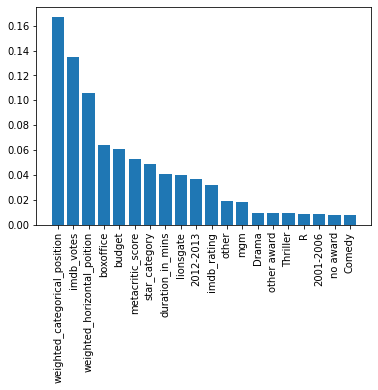

In [ ]:
importances = rf.feature_importances_
feature_name = train_x.columns.values
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90);